Minima: 2.8063651409334934e-07


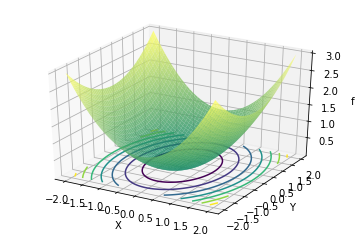

In [33]:
from random import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_min, x_max = -2, 2                          # range of x
y_min, y_max = -2, 2                          # range of x

def f2(x,y):
    return 1/2*x**2 + 1/4*y**2

store = []
cycles=3000000

def minima():       
    for i in range(cycles): 
        store.append(f2(random(),random()))
    return min(store)

print("Minima:", minima())

nx = np.linspace(x_min,x_max,100)
ny = np.linspace(y_min,y_max,100)

x,y = np.meshgrid(nx,ny)

z = f2(x, y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='summer', alpha=0.8)
cset = ax.contour(x,y,z, zdir='z', offset=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')

plt.show()

In [428]:
x0 = x_min + 2*random()*x_max
y0 = y_min + 2*random()*y_max

def grad(f2, x, y, z):
    i = (f2(x + z, y) - f2(x,y))/z
    j = (f2(x, y + z) - f2(x,y))/z
    return np.array([i,j])


start = None
stor = [x0, y0]
step=0.1
c = step
n=1000
    
for i in range(n):
        
    if start is None:
        c = step
    else:
        a = grad(f2,stor[0],stor[1],step) - grad(f2, start[0], start[1],step)
        b = stor - start
        c = (np.dot(b, a))/(np.dot(a,a))    
            
    temp = stor-c*grad(f, stor[0], stor[1],step)

    if f2(temp[0], temp[1]) < f2(stor[0], stor[1]):
        start = stor
        stor = temp
    elif i>0:
        break

print('start', np.array([x0,y0]),'end', stor)
print('value', f2(stor[0],stor[1]), 'cycles', i)

plt.show()

start [ 1.9755602 -0.2120398] end [0.04522609 0.05221478]
value 0.0017042953916902167 cycles 3


In [427]:
from scipy.optimize import minimize

def f4(x):
    return f2(x[0],x[1])

minimum = minimize(f4, [x0, y0], method='CG', tol=.1, options={'disp': True}) 

Optimization terminated successfully.
         Current function value: 0.000906
         Iterations: 2
         Function evaluations: 16
         Gradient evaluations: 4
